In [1]:
import gensim
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [2]:
def get_model():
    #urllib.request.urlretrieve("http://rusvectores.org/static/models/rusvectores2/ruscorpora_mystem_cbow_300_2_2015.bin.gz", "ruscorpora_mystem_cbow_300_2_2015.bin.gz")
    m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'
    if m.endswith('.vec.gz'):
        model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
    elif m.endswith('.bin.gz'):
        model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
    else:
        model = gensim.models.KeyedVectors.load(m)
    return model

In [3]:
def graph(model):
    G = nx.Graph()
    first_word = 'лошадь_S'
    G.add_node(first_word)
    similar_words = []
    part_of_speech = first_word[-2:]
    if first_word in model:
        for i in model.most_similar(positive=[first_word], topn=10):
            if i[1] >= 0.5 and i[0].endswith(part_of_speech):
                G.add_node(i[0])
                G.add_edge(first_word, i[0])
                similar_words.append(i[0])
    else:
        print('Увы, слова "%s" нет в модели!' % first_word)
    for word in similar_words:
        for i in model.most_similar(positive=[word], topn=10):
            if (i[1] >= 0.5 and i[0].endswith(part_of_speech)
                and len(G) < 50):
                G.add_node(i[0])
                G.add_edge(word, i[0])
    print("Количество узлов:", len(G), "Количество ребер:", G.size())
    return G

In [4]:
def graph_info(G):
    deg = nx.degree_centrality(G)
    d = sorted(deg, key=deg.get, reverse=True)
    bet = nx.betweenness_centrality(G)
    b = sorted(bet, key=bet.get, reverse=True)
    cl = nx.closeness_centrality(G)
    c = sorted(cl, key=cl.get, reverse=True)
    eig = nx.eigenvector_centrality(G)
    e = sorted(eig, key=eig.get, reverse=True)
    print("Самый центральный узел по degree centrality:", d[0][:-2])
    print("Самый центральный узел по betweenness centrality:", b[0][:-2])
    print("Самый центральный узел по closeness centrality:", c[0][:-2])
    print("Самый центральный узел по eigenvector centrality:", e[0][:-2])
    print("Плотность графа:", nx.density(G))
    print("Диаметр графа:", nx.diameter(G))
    print("Радиус графа:", nx.radius(G))
    print("Коэффициент кластеризации графа:", nx.average_clustering(G))
    print("Коэффициент ассортативности графа:", nx.degree_pearson_correlation_coefficient(G))

In [5]:
def communities(G):
    communities_generator = community.girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    a = sorted(map(sorted, next_level_communities))
    print('\nВ данном сообществе все слова так или иначе связаны с лошадьми\n\n', a[2])
    print('\nЗдесь перечислены неодушевленные приспособления перевозки\n\n', a[0])
    print('\nЗдесь остальные животные\n\n', a[1])

In [6]:
def visual(G):
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=50)
    nx.draw_networkx_edges(G, pos, edge_color='black')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='Arial')
    plt.axis('off')
    plt.show()

In [7]:
def main():
    G = graph(get_model())
    graph_info(G)
    visual(G)
    communities(G)

Количество узлов: 40 Количество ребер: 85
Самый центральный узел по degree centrality: конь
Самый центральный узел по betweenness centrality: лошадь
Самый центральный узел по closeness centrality: лошадь
Самый центральный узел по eigenvector centrality: лошадь
Плотность графа: 0.10897435897435898
Диаметр графа: 4
Радиус графа: 2
Коэффициент кластеризации графа: 0.5162931512931512
Коэффициент ассортативности графа: -0.5130842268341692


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


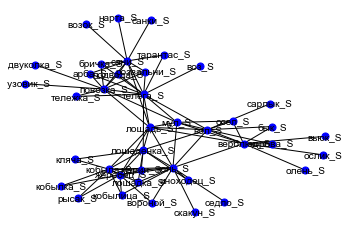


В данном сообществе все слова так или иначе связаны с лошадьми

 ['вороной_S', 'жеребец_S', 'иноходец_S', 'кляча_S', 'кобыла_S', 'кобылица_S', 'кобылка_S', 'конь_S', 'лошаденка_S', 'лошадка_S', 'лошадь_S', 'мерин_S', 'рысак_S', 'седло_S', 'скакун_S']

Здесь перечислены неодушевленные приспособления перевозки

 ['арба_S', 'бричка_S', 'воз_S', 'возок_S', 'грузовик_S', 'двуколка_S', 'нарта_S', 'повозка_S', 'подвода_S', 'розвальни_S', 'сани_S', 'санки_S', 'тарантас_S', 'телега_S', 'тележка_S']

Здесь остальные животные

 ['бык_S', 'верблюд_S', 'вол_S', 'вьюк_S', 'корова_S', 'мул_S', 'олень_S', 'осел_S', 'ослик_S', 'сарлык_S']


In [8]:
if __name__ == '__main__':
    main()